# **I. Latar Belakang**

Permasalahan lalu lintas yang disebabkan oleh kemacetan di wilayah Jakarta merupakan permasalahan yang telah terjadi lebih dari [satu dekade terakhir](https://pl2se.jakarta.go.id/latar-belakang-pl2se). Layanan moda transportasi Transjakarta pertama kali diperkenalkan kepada publik pada 15 Januari 2004 sebagai jaringan bus raya terpadu pertama di Asia Tenggara dan Selatan. Moda transportasi Transjakarta ini diharapkan memberikan jasa angkutan yang lebih cepat, nyaman dengan harga yang terjangkau bagi warga Jakarta. Tidak hanya dari tarif yang terjangkau bagi seluruh golongan ekonomi, namun juga diharapkan efisiensi berkendaraan umum dapat tercapai dengan penyediaan fasilitas pemerintah yang dapat mengurangi kemacetan di Jakarta. Namun, apakah tujuan tersebut memang terbukti telah tercapai dengan pemanfaatan Transjakarta sebagai moda transportasi publik berdasarkan kepadatan penggunanaan layanan yang akan didalami dalam analisa data yang akan dibahas dalam  Analisis  ini.

## **Pernyataan Masalah**

Dalam Analisis Data  ini diharapkan dapat memberikan gambaran secara umum terhadap permasalahan yang dihadapi oleh Pemerintah Daerah DKI Jakarta dalam mencapai **efisiensi jasa angkutan yang lebih cepat dan terjangkau bagi seluruh warga Jakarta** dengan penggunaan moda transportasi Transjakarta. Dengan permasalahan tersebut, diharapkan dapat ditemukan solusi dan mitigasi apa yang perlu diambil oleh Pemerintah Daerah DKI Jakarta dalam meningkatkan layanan moda transportasi publik Transjakarta dan juga Pendapatan Daerah DKI Jakarta.

Analisis ini diharapkan dapat menjawab pertanyaan yang secara garis besar **rute mana saja yang memiliki jumlah penumpang paling tinggi?**




# **II. Data**

Analisa Data ini didukung berdasarkan dataset yang dapat [di laman ini](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from datetime import datetime

import warnings
warnings.filterwarnings ('ignore')

Dataset ini berisi informasi terkait transaksi penumpang Transjakarta di bulan April tahun 2023, mulai dari aktivitas TapIn dan TapOut yang menggunakan kartu pembayaran sebagai tiket, koridor perjalanan, tujuan dengan rincian kolom sebagai berikut:

1.	transID: Identitas transaksi unik untuk setiap transaksi
2.	payCardID: Identifikasi utama penumpang yang ditampilkan berdasarkan kartu penumpang sebagai tiket masuk dan keluar.
3.	payCardBank: Bank penerbit kartu milik penumpang.
4.	payCardName: Nama penumpang yang terdaftar kartu *payCardBank*
5.	payCardSex: Jenis kelamin penumpang yang terdaftar *payCardBank*
6.	payCardBirthDate: tanggal lahir penumpang
7.	corridorID: Identitas kordidor atau identitas rute sebagai kunci untuk pengelompokan rute perjalanan
8.	corridorName: Nama koridor atau nama rute perjalanan yang dengan tujuan awal dan tujuan akhir setiap rute
9.	direction: merupakan arahan rute, dimana 0 berarti 'Mulai', 1 berarti 'Kembali'.
10.	tapInStops: *Tap In* (masuk) Identitas Pemberhentian untuk mengidentifikasi Nama Pemberhentian
11.	tapInStopsName: *Tap In* (masuk) Nama Pemberhentian dimana penumpang *Tap In* *payCardBank* mereka setiap pertama kali masuk di stasiun Transjakarta
12.	tapInStopsLat: Lintang *Tap In* Pemberhentian  
13.	tapInStopsLon: Garis Bujur *Tap In* Pemberhentian
14.	stopStartSeq: Alur pemberhentian, pertama, kedua, dan seterusnya selama perjalanan
15.	tapInTime: Waktu *Tap In* dengan deskripsi tanggal dan waktu
16.	tapOutStops: *Tap Out* (keluar) dengan deskripsi Identitas Pemberhentian untuk Nama Pemberhentian
17.	tapOutStopsName: *Tap Out* (keluar) dengan Nama Pemberhentian dimana penumpang meninggalkan stasiun Transjakarta
18.	tapOutStopsLat: Lintang Pemberhentian *Tap Out*
19.	tapOutStopsLon: Garis Bujur Pemberhentian *Tap Out*
20.	stopEndSeq: Alur pemberhentian, pertama, kedua, dan seterusnya selama perjalanan  
21.	tapOutTime: waktu dan tanggal penumpang *Tap Out*
22.	payAmount: Jumlah penumpang membayar biaya Transjakarta.


## **A. Pemahaman Data**

Dalam bab ini kita perlu mengetahui anatomi dari dataset yang akan digunakan sehingga kita dapat mengetahui anomali apa saya yang terdapat dalam dataset dan apa saja yang perlu dirapihkan dari anomali tersebut.

Pertama kita menampilkan terlebih dahulu 10 baris pertama dari dataset yang kita gunakan pada Analisis Data ini.

In [ ]:
df = pd.read_csv('/Users/katedethan/Documents/Data Science & Machine Learning Class/Exam Module 2/Transjakarta.csv')
df.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


Analisis Data ini menggunakan fiture display.max_columns untuk dapat menampilkan seluruh kolom dataset.

In [ ]:
pd.set_option('display.max_columns', None)

###**1. Ukuran Dataset**

Berikut informasi mengenai jumlah kolom dan baris pada Dataset.

In [ ]:
print ('Jumlah (Baris, Kolom): ', df.shape)

Jumlah (Baris, Kolom):  (37900, 22)


###**2. Informasi Dataset**

Berikut informasi mengenai nama kolom, jumlah non-null value dan tipe data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Berdasarkan tampilan di atas, dapat dipahami bahwa terdapat tipe data yang dapat dikelompokkan menjadi data **Kuantitatif** dan **Kualitatif**.

Jumlah baris Dataset sebesar 37.900, namun terdapat beberapa kolom seperti *payAmount*, *tapInTime* dan *tapOutTime* lebih kecil dari 37.900 sehingga terdapat kemungkinan bahwa terdapat penumpang yang tidak melakukan pembayaran atau tidak dikenakan biaya layanan Transjakarta. Hal ini ditambah dengan data *tapOutTime* lebih sedikit dari *tapInTime*.  

###**3. Statistik Data**

A. Berikut ringkasan statistik yang diperoleh dari kolom yang berisi data **Kuantitatif**.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payCardID,37900.0,4.250060e+17,1.321699e+18,6.040368e+10,1.800442e+14,3.507947e+15,4.699023e+15,4.997694e+18
payCardBirthDate,37900.0,1.990089e+03,1.305148e+01,1.946000e+03,1.982000e+03,1.990000e+03,2.001000e+03,2.012000e+03
direction,37900.0,5.006332e-01,5.000062e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
tapInStopsLat,37900.0,-6.214838e+00,5.791123e-02,-6.394973e+00,-6.245863e+00,-6.214587e+00,-6.175528e+00,-6.089429e+00
tapInStopsLon,37900.0,1.068416e+02,6.036945e-02,1.066147e+02,1.068035e+02,1.068348e+02,1.068823e+02,1.070239e+02
stopStartSeq,37900.0,1.357248e+01,1.223762e+01,0.000000e+00,4.000000e+00,1.000000e+01,1.900000e+01,6.800000e+01
tapOutStopsLat,36556.0,-6.214651e+00,5.902203e-02,-6.394973e+00,-6.247225e+00,-6.214718e+00,-6.174736e+00,-6.091746e+00
tapOutStopsLon,36556.0,1.068412e+02,6.099946e-02,1.066147e+02,1.068017e+02,1.068346e+02,1.068830e+02,1.070237e+02
stopEndSeq,36556.0,2.121991e+01,1.380069e+01,1.000000e+00,1.100000e+01,1.800000e+01,2.900000e+01,7.700000e+01
payAmount,36893.0,2.699713e+03,4.212226e+03,0.000000e+00,0.000000e+00,3.500000e+03,3.500000e+03,2.000000e+04


Berdasarkan tabel deskripsi statistik di atas, dapat dipahami bahwa semua kolom baris merupakan [Data Kuantitatif Kontinyu dan Kuantitatif Diskrit](https://www.coursera.org/articles/types-of-data) dengan deskripsi sebagai berikut:

**Kuantitatif Diskrit**:
1. payCardID
2. payAmount

dimana data-data di atas memiliki sifat yang dapat dihitung.


**Kuantitatif Kontinyu**
1. payCardBirthDate
2. direction
3. tapInStopsLat
4. tapInStopsLon
5. stopStartSeq
6. tapOutStopsLat
7. tapOutStopsLon
8. stopEndSeq

dimana data-data di atas memiliki sifat yang dapat diukur.


B. Berikut ringkasan statistik dari kolom yang berisi data **Kualitatif**

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
transID,37900,37900,EIIW227B8L34VB,1
payCardBank,37900,6,dki,18743
payCardName,37900,1993,Fathonah Saefullah,80
payCardSex,37900,2,F,20157
corridorID,36643,221,1T,400
corridorName,35970,216,Cibubur - Balai Kota,391
tapInStops,36687,2570,P00170,236
tapInStopsName,37900,2602,Penjaringan,243
tapInTime,37900,37079,2023-04-25 06:23:00,3
tapOutStops,35611,2230,P00016,306


Berdasarkan keterangan di atas, seluruh kolom data kualitatif di atas merupakan tipe variabel [Data Kualitatif Nominal](https://www.geeksforgeeks.org/data-types-in-statistics/) dimana data-data dalam kolom tersebut tidak dapat diurutkan sehingga tidak nilai di dalamnya tidak dapat dibandingkan satu sama lain.

###**4. Unique Value**

Berikut jumlah unique value dan data dari Dataset

In [ ]:
list_item = []
for col in df.columns:
  list_item.append([col, df[col].nunique(), df[col].unique()])

table_uv = pd.DataFrame(columns=['Column Name', 'Sum of UV', 'Unique Data'], data=list_item)

In [ ]:
pd.set_option('display.max_colwidth', 0)
table_uv

,Column Name,Sum of UV,Unique Data
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, S.H., Tg

Berdasarkan Table_UV di atas, dapat dilihat bahwa, diantaranya:


*   Beberapa kolom seperti *payAmount* dan *corridorID* memiliki data kosong yang diwakili dengan data "nan".
*   Terdapat Nama Penumpang pada kolom *payCardName* yang menyertakan nama gelar penumpang seperti "drg." sebelum nama penumpang dan ada nama penumpang yang tidak memiliki gelar. Jika kita pahami, "drg" merupakan titel profesi untuk "dokter gigi" bukan panggilan untuk "Bapak", "Nyonya" atau "Nona" pada umumnya untuk mengawali panggilan nama. Ditambah lagi, karena Nama Penumpang tidak relevan dalam tujuan analisis permasalahan ini sehingga kolom *payCardName*, maka kita tidak akan fokus pada kolom tersebut.
*   Terdapat penyebutan nama kartu pembayaran yang membingungkan (*misleading*) seperti "dki" yang seharusnya "JakCard" untuk pembayaran dengan kartu Bank DKI dan "bni" yang seharusnya "tapcash" untuk pembayaran dengan kartu Bank BNI.






###**5. Targeted Variables**

Berdasarkan pemahaman data di atas, maka variable yang akan digunakan sebagai dasar Analisis Data ini adalah

| Kolom                        | Deskripsi                                                      |
|-------------------------------|------------------------------------------------------------------|
| corridorID                     | Identitas kordidor atau identitas rute sebagai kunci untuk pengelompoka rute perjalanan                  |
| corridorName                      | Nama koridor atau nama rute perjalanan yang dengan tujuan awal dan tujuan akhir setiap rute                                      |
| tapInStops                           | Tap In (masuk) Nama Pemberhentian dimana penumpang Tap In payCardBank mereka setiap pertama kali masuk ke stasiun Transjakarta Pemberhentian                                     |
| tapInStopsName                  | Tap In (masuk) Nama Pemberhentian dimana penumpang Tap In payCardBank mereka setiap pertama kali masuk ke stasiun Transjakarta                       |
| stopStartSeq                      | Alur pemberhentian, pertama, kedua, dan seterusnya selama perjalanan                           |
| tapInTime                       | Waktu Tap In dengan deskripsi tanggal dan waktu                                   |
| tapOutStops                      | Tap Out (keluar) dengan deskripsi Identitas Pemberhentian untuk Nama Pemberhentian                       |
| tapOutStopsName                       | Tap Out (keluar) dengan Nama Pemberhentian dimana penumpang keluar dari stasiun Transjakarta                               |
| tapOutTime              | waktu dan tanggal penumpang Tap Out                   |

##**B. Data Cleaning**

Berdasarkan deskripsi Table_UV di atas, dalam ringkasan terdapat beberapa anomali. Untuk memastikannya, maka kita perlu mengolah kembali untuk menampilkan Missing Value dari Dataset.

###**1. Mengidentifikasi Missing Value**

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.isna().sum().T

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Kita dapat melihat dari hasil di atas bahwa terdapat Missing Values untuk kolom:
1. corridorID
2. corridorName
3. tapInStops
4. tapOutStops
5. tapOutStopsName
6. tapOutStopsLat
7. tapOutStopsLon
8. stopEndSeq
9. tapOutTime
10. payAmount

dimana jumlah missing values antara 1000 sampai dengan lebih dari 2200. Berikut adalah perhitungan persentase dari seluruh Missing Values, dimana ditampilkan bahwa kolom *tapInStops* memiliki persentase Missing Value paling tinggi di antara seluruh kolom dengan Missing Value yaitu sebesar 6.04%

In [ ]:
#missing value percentage
mv_prcntg = df_clean.isna().sum()/df_clean.shape[0]*100
print(round(mv_prcntg,2))

transID             0.00
payCardID           0.00
payCardBank         0.00
payCardName         0.00
payCardSex          0.00
payCardBirthDate    0.00
corridorID          3.32
corridorName        5.09
direction           0.00
tapInStops          3.20
tapInStopsName      0.00
tapInStopsLat       0.00
tapInStopsLon       0.00
stopStartSeq        0.00
tapInTime           0.00
tapOutStops         6.04
tapOutStopsName     3.55
tapOutStopsLat      3.55
tapOutStopsLon      3.55
stopEndSeq          3.55
tapOutTime          3.55
payAmount           2.66
dtype: float64


###**2. Mengidentifikasi Duplicated Value**

In [ ]:
df_clean.duplicated().sum()

np.int64(0)

Setelah memahami data dan mencari apakah terdapat duplikasi data, **tidak ditemukan bahwa terdapat Data Duplikat** dalam Dataset.

Namun, dengan mempertimbangkan hasil Missing Value di atas:

1.   Kita dapat mengisi baris atau kolom yang tidak relevan dalam Analisis Data ini yang berisi Missing Value, seperti *payAmount*;  
2.   Kita dapat mengisi data yang hilang dengan nilai sebenarnya atau nilai yang mendekati nilai sebenarnya dengan alternatif menggunakan angka, mean, median atau modus; dan
3. Jika cara demikian masih tidak dapat mendukung pengolahan, maka baris yang memiliki Missing Value akan dihapus.



###**3. Mengatasi Missing Value**

Dalam menangani Missing Value pada suatu Dataset, salah satu [artikel](https://www.kaggle.com/code/dansbecker/handling-missing-values) dalam Kaggle menyarankankan:

1. Menghapus Kolom dengan Missing Value
2. Memberikan Imput
3. Memberikan Imput lebih lanjut

Menampilkan baris yang mengandung Missing Value dalam Dataset (nan). Satu per satu dengan variabel yang saling berkaitan.


####*a.tapInStops vs tapOutStops*

Kolom 'tapInStops' memiliki Missing Value sebesar 3.2% sedangkan 'tapOutStops' memiliki Missing Value sebesar 6.0% dimana hampir dua kali lebih banyak dari 'tapInStops' dengan jumlah sebagai berikut:  


In [ ]:
df_clean[['tapInStops', 'tapOutStops']].isna().sum()

tapInStops     1213
tapOutStops    2289
dtype: int64

####*b.tapInStopsName vs tapOutStopsName*

Kolom 'tapInStopsName' tidak memiliki Missing Value sedangkan 'tapOutStopsName' memiliki Missing Value sebesar 3.5% dengan jumlah sebagai berikut:  


In [ ]:
df_clean[['tapInStopsName', 'tapOutStopsName']].isna().sum()

tapInStopsName     0   
tapOutStopsName    1344
dtype: int64

####*c.tapInTime vs tapOutTime*

Kolom 'tapInTime' tidak memiliki Missing Value sedangkan 'tapOutTime' memiliki Missing Value sebesar 3.5% dengan jumlah sebagai berikut:  

In [ ]:
df_clean[['tapInTime', 'tapOutTime']].isna().sum()

tapInTime     0   
tapOutTime    1344
dtype: int64

####*c.corridorID vs corridorName*

Kolom 'corridorID' memiliki Missing Value sebesar 3.3% sedangkan 'corridorName' memiliki Missing Value sebesar 5.1% dengan jumlah sebagai berikut:  

In [ ]:
df_clean[['corridorID', 'corridorName']].isna().sum()

corridorID      1257
corridorName    1930
dtype: int64

####d.Asumsi Penghapusan Data

Dengan memperhatikan jumlah perbandingan:
1. tapInStops vs tapOutStops
2. tapInTime vs tapOutTime
3. corridorID vs corridorName

dan juga memperhatikan Table Missing Value (B.1 di atas), diasumsikan pemahaman bahwa terdapat kemungkinan adanya kesalahan pada sistem pencatatan penumpang yang keluar (Tap Out) dimana:

*   Terdapat jumlah penumpang yang tercatat pada saat Tap In (*tapInTime*) walaupun tidak tercatat di Stasiun mana penumpang tersebut masuk (*tapInStopsName*)
*   Dataset menampilkan bahwa Missing Value *payAmount* lebih kecil daripada Missing Value *tapOutStops*, *tapOutTime* maupun *tapOutStopsName*. Sehingga dapat diasumsikan bahwa terdapat sekitar kurang lebih 300 penumpang yang tidak terdaftar Tap Out namun telah melakukan pembayaran.
*  Jumlah Missing Value tidak lebih 7% dari total data yang ada dalam Dataset.
*  kolom corridorID dan corridorName yang memiliki Missing Value tidak relevan untuk dilakukan pengisian data dengan Imputing. Jika dalam hal pun, baris dalam kedua kolom tersebut diisi dengan data apapun yang tidak dapat membuktikan destinasi maupun lokasi stasiun Jakarta, akan mengakibatkan data menjadi tidak valid. Sehingga data tersebut tidak dapat digunakan. Oleh karena itu, Missing Value pada kedua kolom tersebut akan kita hapus.


Oleh karena itu, kami akan menghapus baris *tapOutStops*, *tapOutStopsName* dan *tapOutTime*.





In [ ]:
#hapus baris yang berisi Missing Value
df_clean.dropna(subset=['tapOutStops', 'tapOutStopsName', 'tapOutTime'], inplace=True)

In [ ]:
#hapus barus kolom Missing Value kolom corridorID dan corridorName
df_clean.dropna(subset=['corridorID', 'corridorName'], inplace=True)

In [ ]:
#pengecekan baris dengan Missing Value setelah penghapusan
df_clean[['tapOutStops', 'tapOutStopsName', 'tapOutTime', 'corridorID', 'corridorName']].isna().sum()


tapOutStops        0
tapOutStopsName    0
tapOutTime         0
corridorID         0
corridorName       0
dtype: int64

diketahui dari hasil di atas bahwa tidak ada Missing Value pada seluruh tapOuts dan tapIns

####e.Input Nilai Median untuk Mengisi Missing Value dalam payAmount

In [ ]:
#mencari MEDIAN untuk nilai NULL dalam payAmount
payAmount_median = df_clean['payAmount'].median()
payAmount_median

np.float64(3500.0)

In [ ]:
df_clean['payAmount'].unique()

array([ 3500., 20000.,    nan,     0.])

Berdasarkan tampilan table Jumlah Missing Value di atas sebelumnya, diketahui bahwa jumlah Missing Value untuk payAmount adalah sejumlah 1007 data atau setara dengan 2.66% dari seluruh jumlah value dalam payAmount. Analisa Data ini menggunakan nilai Median untuk melengkapi Missing Value dengan pertimbangan bahwa nilai median lebih tepat dibanding nilai *mean*. Jika kita menggunakan nilai *mean* maka akan muncul hasil float dimana hal tersebut tidak mungkin terjadi karena tarif transjakarta dalam nilai bilangan bulat antara Rp3.500 atau Rp2.000. Oleh karena itu, kita menggunakan angka median yang muncul dengan Rp3.500 menggantikan isi Missing Value.

In [ ]:
df_clean['payAmount'].fillna(value=payAmount_median, inplace=True)

In [ ]:
df_clean['payAmount'].isna().sum()

np.int64(0)

In [ ]:
df_clean['payAmount'].value_counts()

payAmount
3500.0     17345
0.0        14762
20000.0    1573 
Name: count, dtype: int64

In [ ]:
#pengecekan kembali seluruh Missing Value dalam Dataset
df_clean.isna().sum().T

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          0   
corridorName        0   
direction           0   
tapInStops          1085
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         0   
tapOutStopsName     0   
tapOutStopsLat      0   
tapOutStopsLon      0   
stopEndSeq          0   
tapOutTime          0   
payAmount           0   
dtype: int64

berdasarkan data di atas, setelah cleaning data masih ada Missing Value pada kolom 'tapInStops', maka kita menghapus Missing Value pada kolom tersebut.

In [ ]:
df_clean.dropna(subset=['tapInStops'], inplace=True)

In [ ]:
#pengecekan kembali seluruh Missing Value dalam Dataset
df_clean.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32595 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           32595 non-null  object 
 1   payCardID         32595 non-null  int64  
 2   payCardBank       32595 non-null  object 
 3   payCardName       32595 non-null  object 
 4   payCardSex        32595 non-null  object 
 5   payCardBirthDate  32595 non-null  int64  
 6   corridorID        32595 non-null  object 
 7   corridorName      32595 non-null  object 
 8   direction         32595 non-null  float64
 9   tapInStops        32595 non-null  object 
 10  tapInStopsName    32595 non-null  object 
 11  tapInStopsLat     32595 non-null  float64
 12  tapInStopsLon     32595 non-null  float64
 13  stopStartSeq      32595 non-null  int64  
 14  tapInTime         32595 non-null  object 
 15  tapOutStops       32595 non-null  object 
 16  tapOutStopsName   32595 non-null  object 
 17

Sebelum pembersihan data, kita memiliki 37.900 baris data, sekarang kita memiliki 32.595 baris. Sekitar 5.305 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

###**3. Identifikasi Outlier**

####a.Konversi Data Menjadi DateTime

In [ ]:
df_clean['tapInTime'] = pd.to_datetime(df_clean['tapInTime'])
df_clean['tapInTime'].sort_values(ascending=True)

37751   2023-04-01 06:22:27
37866   2023-04-01 06:54:35
37722   2023-04-01 07:32:50
37683   2023-04-01 09:41:03
37658   2023-04-01 12:35:29
                ...        
34110   2023-04-30 21:35:55
34293   2023-04-30 21:43:18
34336   2023-04-30 21:46:00
34258   2023-04-30 21:48:15
34234   2023-04-30 21:51:08
Name: tapInTime, Length: 32595, dtype: datetime64[ns]

In [ ]:

df_clean['tapOutTime'] = pd.to_datetime(df_clean['tapOutTime'])
df_clean['tapOutTime'].sort_values(ascending=True)

37866   2023-04-01 07:27:31
37751   2023-04-01 08:15:45
37722   2023-04-01 08:16:02
37683   2023-04-01 10:27:36
37658   2023-04-01 14:16:26
                ...        
34258   2023-04-30 22:57:47
34624   2023-04-30 22:57:54
34598   2023-04-30 23:00:01
34424   2023-04-30 23:02:25
34234   2023-04-30 23:23:18
Name: tapOutTime, Length: 32595, dtype: datetime64[ns]

In [ ]:
df_trans = df_clean.assign(
    dateTapIn = df_clean['tapInTime'].dt.date,
    timeTapIn = df_clean['tapInTime'].dt.time,
    hourTapIn = df_clean['tapInTime'].dt.hour,
    tapInDay = df_clean['tapInTime'].dt.day,
    tapInMonth = df_clean['tapInTime'].dt.month,
    tapInYear = df_clean['tapInTime'].dt.year,
    dateTapOut = df_clean['tapOutTime'].dt.date,
    timeTapOut = df_clean['tapOutTime'].dt.time,
    hourTapOut = df_clean['tapOutTime'].dt.hour,
    tapOutDay = df_clean['tapOutTime'].dt.day,
    tapOutMonth = df_clean['tapOutTime'].dt.month,
    tapOutYear = df_clean['tapOutTime'].dt.year
)
df_trans.head(5)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,dateTapIn,timeTapIn,hourTapIn,tapInDay,tapInMonth,tapInYear,dateTapOut,timeTapOut,hourTapOut,tapOutDay,tapOutMonth,tapOutYear
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,2023-04-03,05:21:44,5,3,4,2023,2023-04-03,06:00:53,6,3,4,2023
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,2023-04-03,05:42:44,5,3,4,2023,2023-04-03,06:40:01,6,3,4,2023
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,2023-04-03,05:59:06,5,3,4,2023,2023-04-03,06:50:55,6,3,4,2023
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,2023-04-03,05:44:51,5,3,4,2023,2023-04-03,06:28:16,6,3,4,2023
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,2023-04-03,06:17:35,6,3,4,2023,2023-04-03,06:57:03,6,3,4,2023


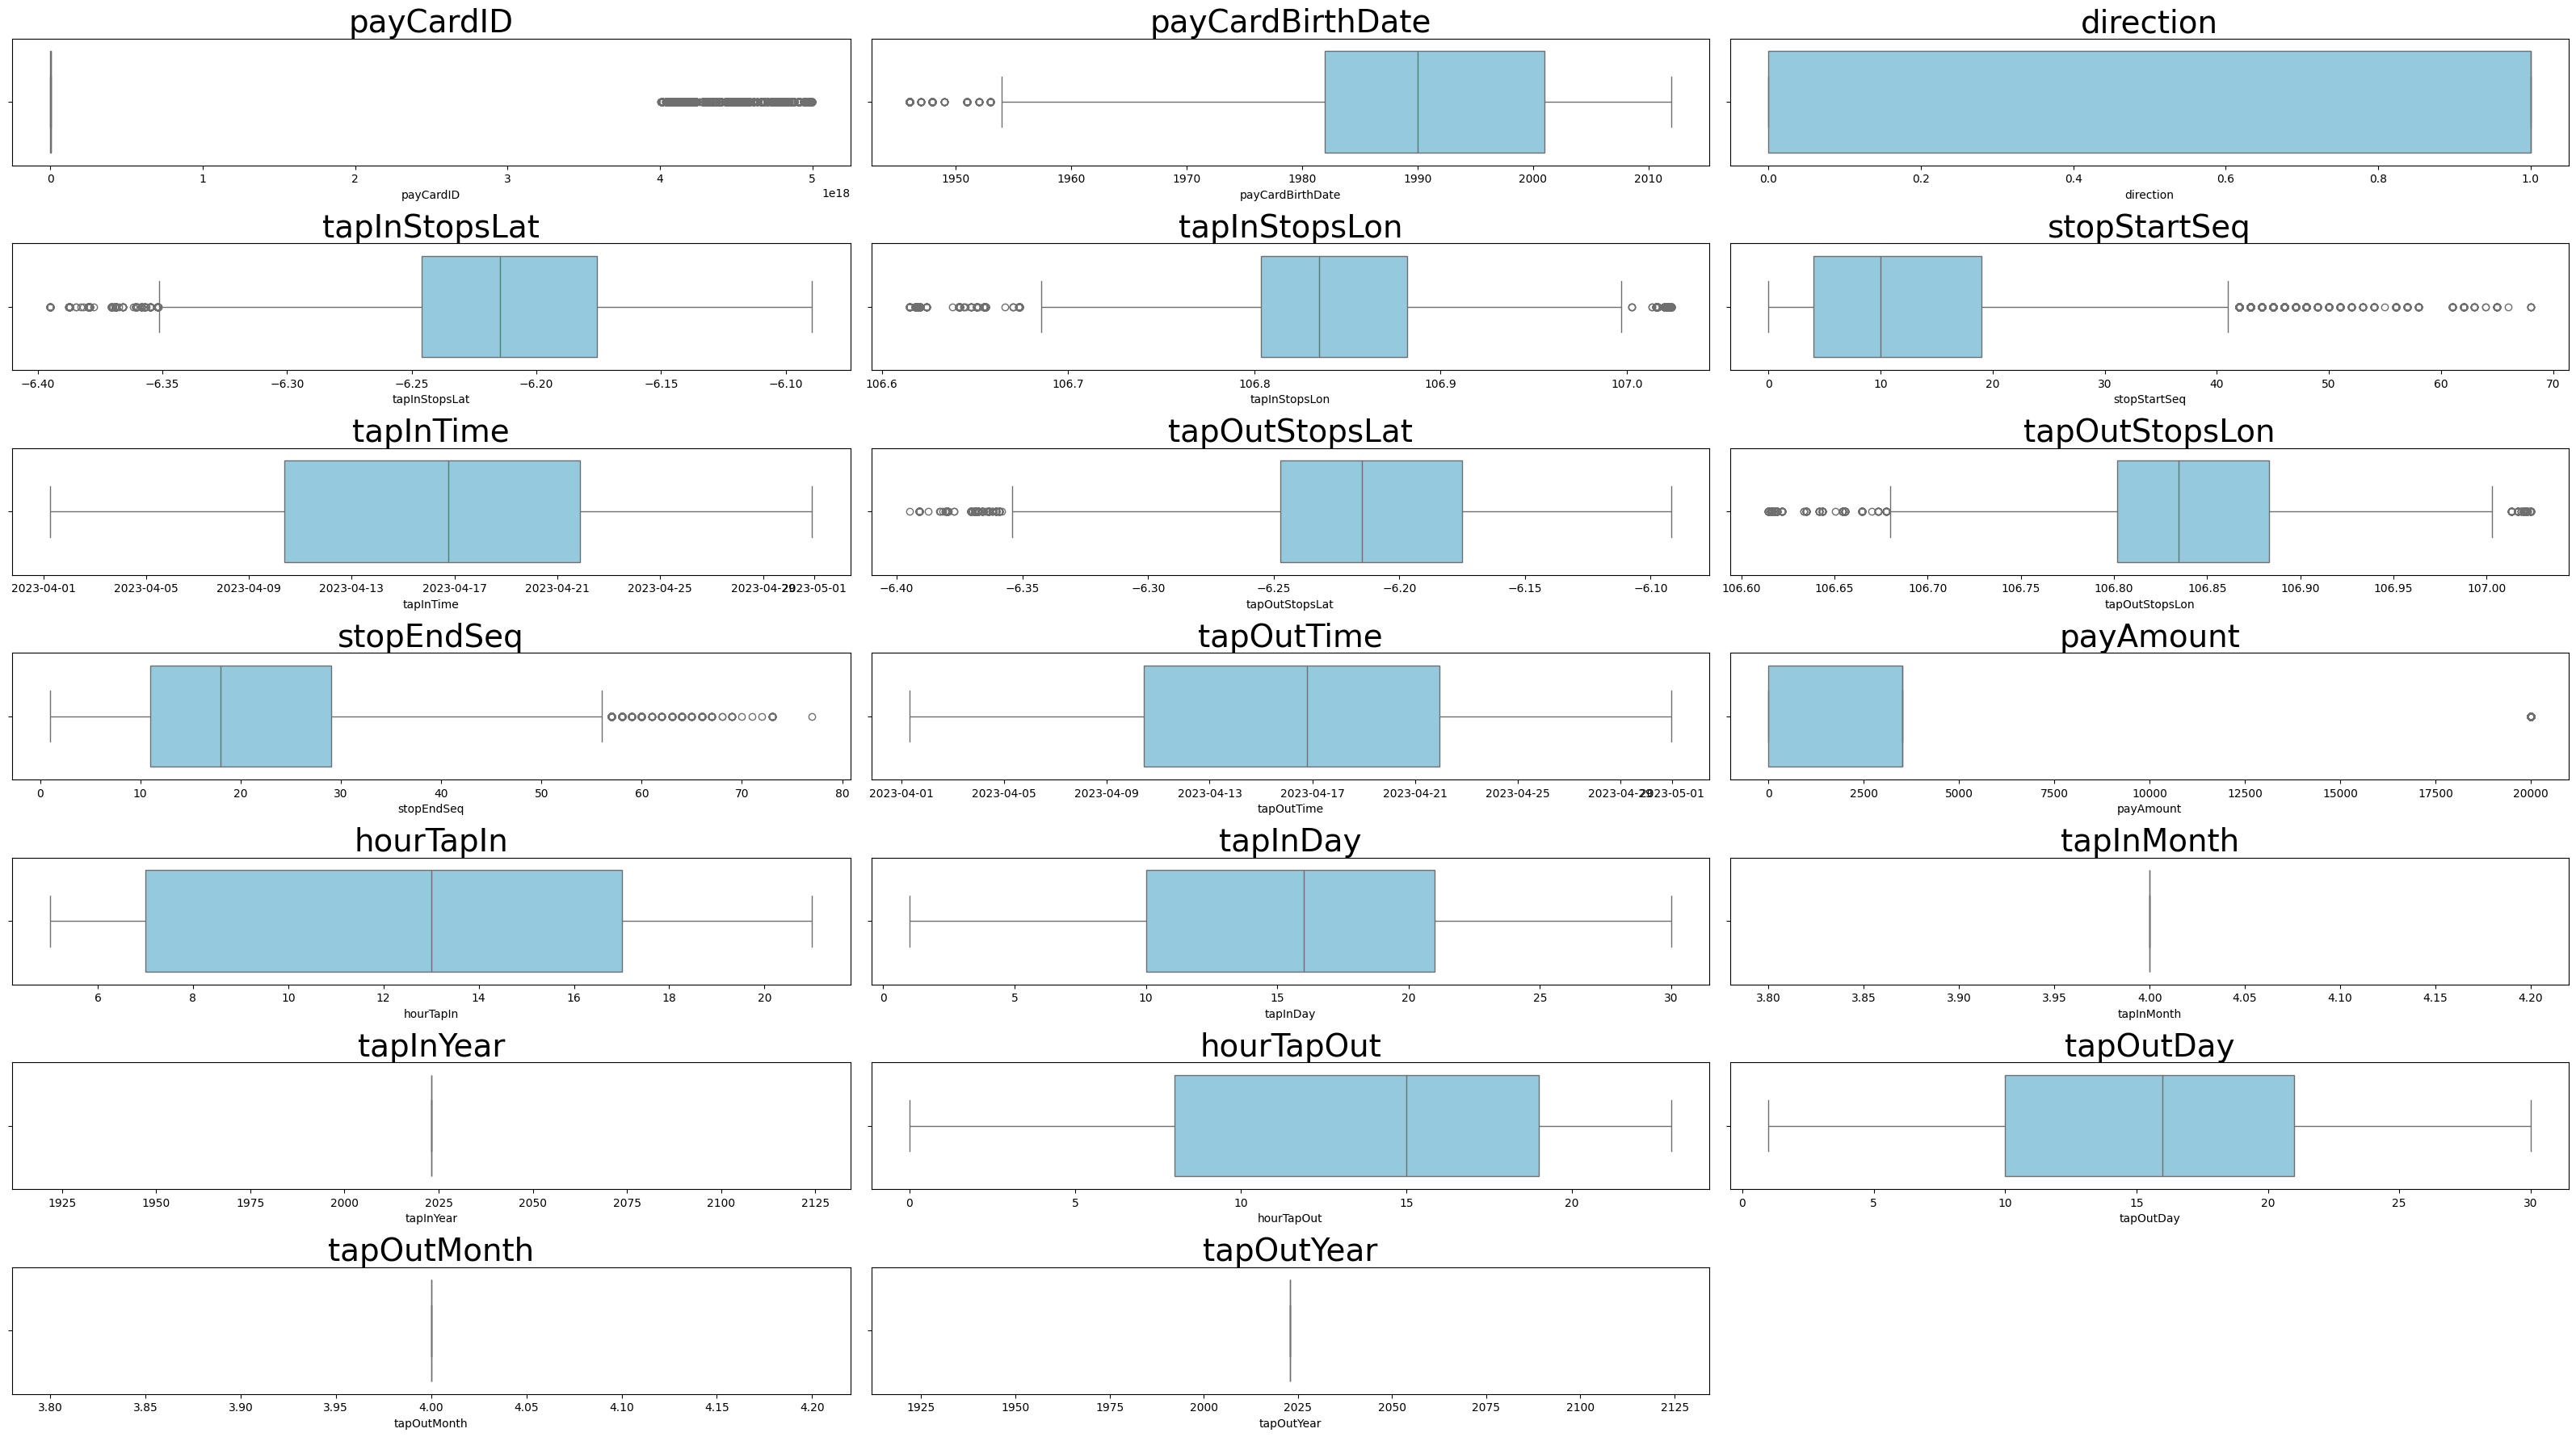

In [ ]:
plt.figure(figsize=(32,20))
plotnumber = 1

for col in (x for x in df_trans.describe().columns):
    ax = plt.subplot(8,3,plotnumber)
    sns.boxplot(x=col,data=df_trans, color='skyblue')
    plt.title(col,fontsize=28)
    plt.tight_layout()
    plotnumber+=1

plt.show()

Kita dapat melihat dari Boxplot di atas terdapat *outlier* di beberapa kolom. Namun, yang menjadi perhatian kita khususnya untuk diperhatikan adalah payAmount dan untuk kolom lainnya tidak menjadi fokus dengan alasan, kolom tersebut bukan merupakan Targeted Variables atau tidak berdampak mengubah signifikan pada Analisa Data ini, atau dengan kata lain outlier tersebut masih dapat diatasi dengan pengolahan manipulasi data.  

####b.Outlier Age_Segment

In [ ]:
df_trans['Age'] = 2023 - df_trans['payCardBirthDate']
df_trans['Age'].sort_values().T

22302    11
29815    11
8890     11
1990     11
35396    11
         ..
26133    77
22133    77
15301    77
30301    77
17633    77
Name: Age, Length: 32595, dtype: int64

In [ ]:
df_trans['Age'].sort_values().unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77])

In [ ]:
df_trans['Age_Segment'] = ['11-17' if x <=17 else '18-30' if x >= 18 and x <= 30 else '31-50' if x >= 31 and x <= 50 else '51-65' if x >= 51 and x <= 65 else '>65' for x in df_trans['Age']]
df_trans['Age_Segment'].value_counts()

Age_Segment
31-50    15387
18-30    9378 
11-17    4671 
51-65    2748 
>65      411  
Name: count, dtype: int64

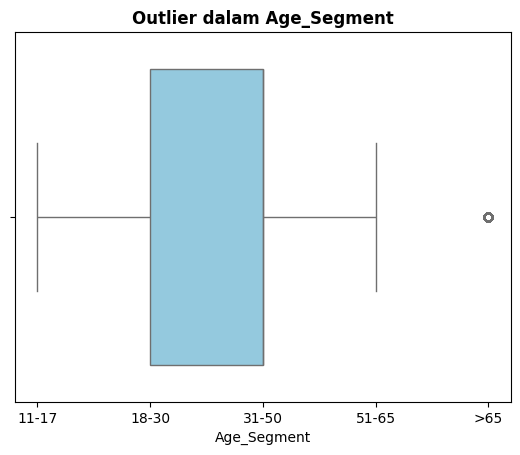

In [ ]:
sns.boxplot(x='Age_Segment',data=df_trans, color= 'skyblue')
plt.title('Outlier dalam Age_Segment', fontweight='bold')
plt.show()

Boxplot Age_Segment di atas menunjukan terdapat golongan penumpang Transjakarta yang berusia dari 65 tahun dimana jauh dari jumlah besar Age_Segment pada umumnya yang di sekitar 30 sampai dengan 45.

####c.Outlier hourTapIn

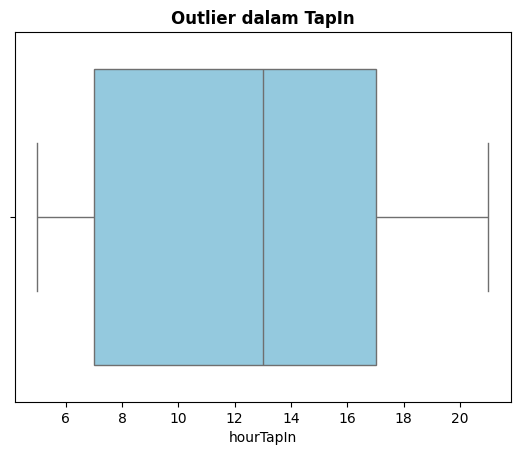

In [ ]:
sns.boxplot(x='hourTapIn',data=df_trans, color='skyblue')
plt.title('Outlier dalam TapIn', fontweight='bold')
plt.show()

####d.Outlier hourTapOut

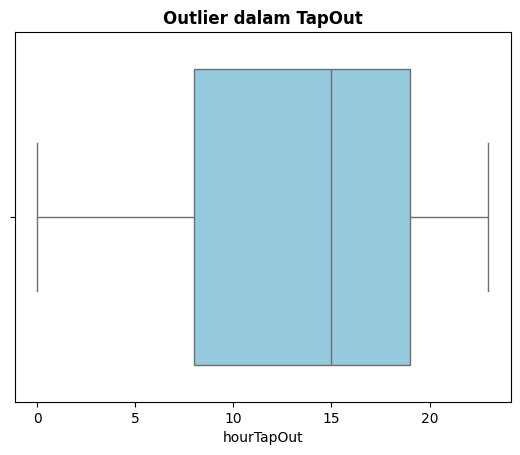

In [ ]:
sns.boxplot(x='hourTapOut',data=df_trans, color='skyblue')
plt.title('Outlier dalam TapOut', fontweight='bold')
plt.show()

Tidak terdapat outlier dalam TapIn dan TapIn.

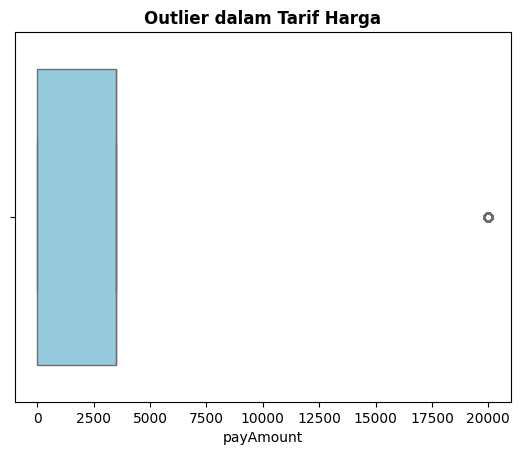

In [ ]:
sns.boxplot(x='payAmount',data=df_trans, color='skyblue')
plt.title('Outlier dalam Tarif Harga', fontweight='bold')
plt.show()

Tampilan boxplot di atas menunjukkan bahwa terdapat kondisi harga sebesar Rp20.000 dimana hal tersebut seharusnya tidak sesuai dengan tarif Transjakarta dimana tarif tetap sebesar Rp3.500. Kami asumsikan bahwa penulisan tarif "Rp20000" tersebut merupakan kesalahan input data dari harga seharusnya sebesar Rp2.000 dimana harga tersebut adalah harga yang berlaku bagi penumpang transjakarta pada pukul [05.00 s.d. 07.00 ](https://redigest.web.id/2022/08/tarif-integrasi-tiga-moda-transportasi-dki-jakarta-diberlakukan/) pagi Waktu Indonesia Barat. Ditambah bahwa terdapat sejumlah penumpang yang menggunakan layanan Transjakarta selama jam tersebut dan dapat diasumsikan bahwa penumpang-penumpang tersebut seharusnya mendapatkan pengenaan tarif sebesar Rp2000. Sehingga tindakan yang akan kita ambil adalah memperbaiki penulisan "20000" menjadi "2000" sebagaimana di bawah ini.

In [ ]:
df_clean['payAmount'].replace(to_replace=20000,
           value=2000, inplace=True)

In [ ]:
df_trans['payAmount'].replace(to_replace=20000,
           value=2000, inplace=True)

Kita telah mengganti nilai '20000' menjadi '2000' pada kedua dataset yang telah digunakan sampai dengan baris ini. Berikut hasil perubahan *unique value* masing-masing dataset untuk kolom payAmount adalah tarif pembayaran transjakarta sebesar : **"Rp0, Rp2000, dan Rp3500"**

In [ ]:
df_clean['payAmount'].unique()

array([3500., 2000.,    0.])

In [ ]:
df_trans['payAmount'].unique()

array([3500., 2000.,    0.])

#**III. Data Analysis**

Kita sudah melakukan tahap data cleaning. Kita akan melanjutkan dengan analisis data untuk mengetahui inti permasalahan.
Analisis dilakukan dengan membandingkan Targeted Variables dengan menampilkan visualisasi data terlebih dahulu yang kemudian akan kita tutup dengan hipotesa analisis.

##**A. Visualisasi Data**

### 1.PieChart Distribusi Tarif Transjakarta berdasarkan payAmount

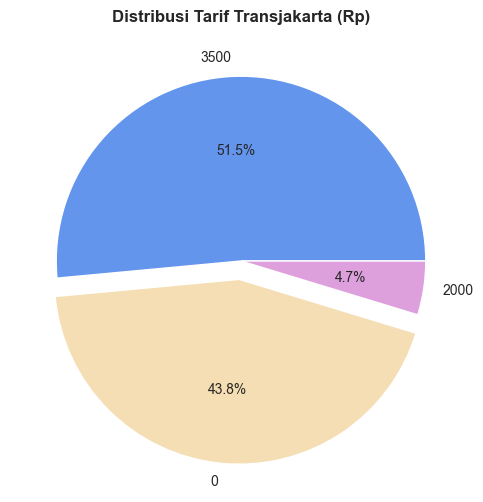

In [ ]:
%matplotlib inline
payAmount_pie = df_clean['payAmount'].value_counts()
colors = ['cornflowerblue','wheat','plum']
labels= [3500, 0, 2000]
plt.figure(figsize=(6,6))
sns.set_style("white")
l, a = list(set(df_clean['payAmount'])), []
for j in range (len(payAmount_pie)):
    a.append(df_clean['payAmount'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(payAmount_pie, labels=labels, colors=colors, autopct='%1.1f%%', explode=[0, 0.1, 0])
plt.title('Distribusi Tarif Transjakarta (Rp)', fontweight='bold')
plt.show()

**Analisis Visualisasi Data** :

Pie Chart Distribusi Tarif Jakarta menampilkan bahwa pembayaran tarif layanan Transjakarta sebesar Rp0 (43.8%) hampir menyaingi pembayaran tarif normal pada umumnya yaitu sebesar Rp3500 (51.5%). Namun, hal ini seharusnya tidak diharapkan terjadi karena dengan demikian hampir sebagian seluruh penumpang Transjakarta pada bulan April 2023 tidak melakukan pembayaran sama sekali selama menggunakan layanan Transjakarta. Namun, penumpang tersebut masih tercatat melakukan TapOut dalam Stasiun Transjakarta yang berbeda dari stasiun penumpang melakukan TapIn. Sebagai contoh 5 penumpang teratas berikut muncul sebagai penumpang yang menggunakan layanan transjakarta namun tidak dikenakan beban pembayaran.

Adapun penyebab dari terjadinya kehilangan input data ini dapat dikatakan termasuk dalam konsep **Missing at Random (MAR)** dimana data input pembayaran 0 bukan karena kesalahan penumpang, namun bisa terjadi karena adanya error pada mesin TapOut dalam stasiun Transjakarta yang gagal menarik pembayaran penumpang selama TapOut. Jika pembayaran 0 disebabkan karena penumpang, seharusnya penumpang tidak tercatat TapOut, namun dalam hal ini, dataset menunjukan terdapat penumpang yang melakukan TapIn dan TapIn hanya tidak dikenakan pembayaran sebelum melewati stasiun TapIn.

*Kesalahan pada error system ini, jika benar, dapat mempengaruhi pendapatan Transjakarta secara signifikan apabila tidak diperbaiki.*

In [ ]:
df_trans.loc[df_trans['payAmount']== 0].head(5)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,dateTapIn,timeTapIn,hourTapIn,tapInDay,tapInMonth,tapInYear,dateTapOut,timeTapOut,hourTapOut,tapOutDay,tapOutMonth,tapOutYear,Age,Age_Segment
14,LZFD368Q3E81HJ,4056836188316,online,Nadine Utami,M,1975,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00608P,Gelanggang Remaja Pasar Minggu,-6.284615,106.837870,5,2023-04-03 05:38:44,B01062P,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0,2023-04-03,05:38:44,5,3,4,2023,2023-04-03,06:09:17,6,3,4,2023,48,31-50
19,ZYRL615G4C05RD,5430018591726410,dki,Karna Waskita,M,1981,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,B00722P,Gunung Sahari Mangga Dua Timur,-6.137032,106.832540,20,2023-04-03 06:43:49,B05989P,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,2023-04-03 07:30:45,0.0,2023-04-03,06:43:49,6,3,4,2023,2023-04-03,07:30:45,7,3,4,2023,42,31-50
24,SYLN486U0E02TA,2295833910329055,dki,Taufik Farida,F,1981,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05023P,Simpang Pahlawan Revolusi 1,-6.238658,106.899461,28,2023-04-03 05:43:14,B03135P,RS Duren Sawit 2,-6.232262,106.91019,39.0,2023-04-03 06:12:52,0.0,2023-04-03,05:43:14,5,3,4,2023,2023-04-03,06:12:52,6,3,4,2023,42,31-50
27,MSFD430X8W13TO,4384653483539395,dki,"Cut Hana Maulana, S.H.",F,1979,3B,Rusun Flamboyan - Cengkareng,0.0,B06299P,Jln. Kayu Besar Dalam,-6.122739,106.731290,2,2023-04-03 05:49:39,B02195P,Mall Taman Palem 3,-6.140548,106.73011,6.0,2023-04-03 06:42:12,0.0,2023-04-03,05:49:39,5,3,4,2023,2023-04-03,06:42:12,6,3,4,2023,44,31-50
36,AXTN077R7Z77JM,675990206087,flazz,Margana Narpati,F,1989,BW9,Monas - Pantai Indah Kapuk,1.0,B02476P,Monas 2,-6.175999,106.823110,7,2023-04-03 06:29:57,B02477P,Monas 3,-6.178787,106.82304,8.0,2023-04-03 07:24:08,0.0,2023-04-03,06:29:57,6,3,4,2023,2023-04-03,07:24:08,7,3,4,2023,34,31-50


### 2.corridorID dengan TapIn dan jumlah transID tertinggi

####*a. corridorID dengan TapIn dan jumlah transID tertinggi*

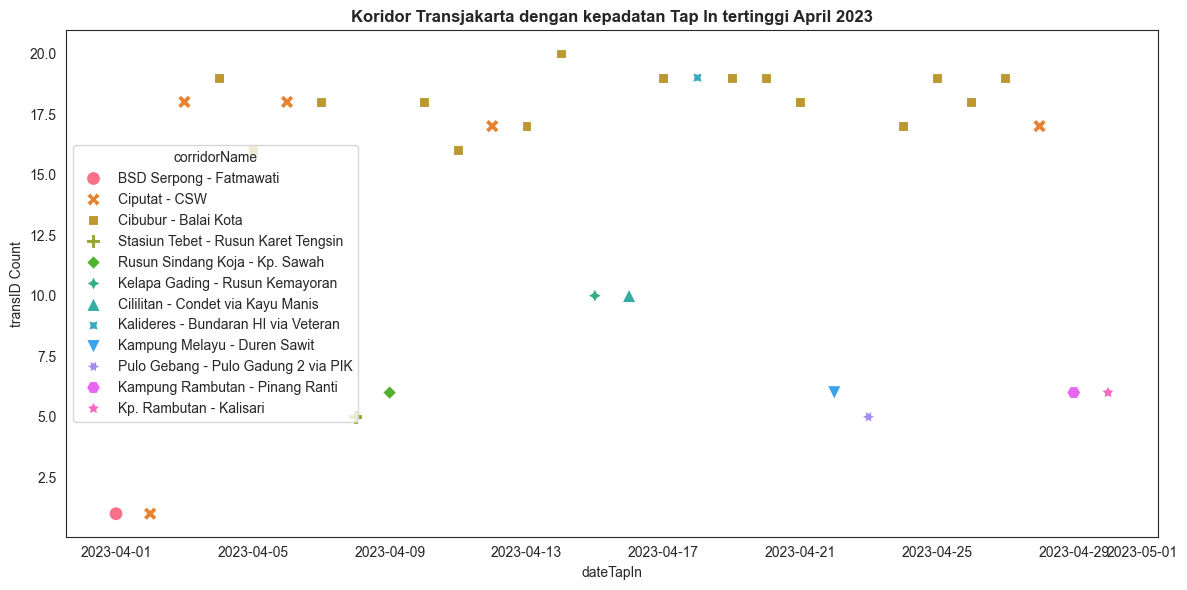

In [ ]:
daily_trax = df_trans.groupby(['dateTapIn','dateTapOut','corridorName']).size().reset_index(name='transID_count')

top_corridors_per_day = daily_trax.loc[daily_trax.groupby('dateTapIn')['transID_count'].idxmax()]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_corridors_per_day, x='dateTapIn', y='transID_count', hue='corridorName', style='corridorName', s=100)

plt.title('Koridor Transjakarta dengan kepadatan Tap In tertinggi April 2023', fontweight='bold')
plt.xlabel('dateTapIn')
plt.ylabel('transID Count')
plt.tight_layout()
plt.show()

**Analisis Visualisasi Data** :

 scatterplot menunjukan bahwa corridor 1T dengan tujuan Cibubur - Balai Kota sering kali muncul dalam dataset sebagai koridor yang banyak transaksi TapIn dengan jumlah penumpang sekitar 16.000 sampai dengan 20.000 penumpang per hari. Kemudian disusulkan posisi kedua pada Koridor Ciputat - CSW yang menampung penumpang sejumlah mulai dari kurang lebih 200 - 18.000 (di hari tertentu).

####*b. jumlah tapInDay diukur berdasarkan kepadatan hourTapIn*

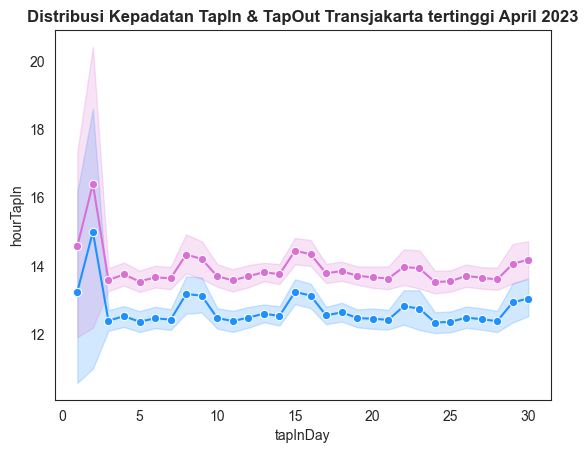

In [ ]:

sns.lineplot(data=df_trans, x='tapInDay', y='hourTapIn', marker='o', color='dodgerblue')
sns.lineplot(data=df_trans, x='tapOutDay', y='hourTapOut', marker='o', color='orchid')

plt.title('Distribusi Kepadatan TapIn & TapOut Transjakarta tertinggi April 2023', fontweight='bold')
plt.show()

**Analisis Visualisasi Data** :

Kepadatan penumpang Transjakarta selama April 2023 TapIn pada pukul 13.00 WIB dan TapOut pukul 17.00 WIB. Ada pun jumlah kepadatan ini cenderung naik selama hari selama weekend khususnya pada jam sore tersebut. Jika diperhatikan lebih seksama, sebelum tanggal 25 April 2023 jumlah TapIn meningkat jauh karena hari tersebut bersinggungan dengan Hari Raya Lebaran yang jatuh pada tanggal [22-23 April 2023](https://maluku.kemenag.go.id/artikel/kementerian-agama-putuskan-idul-fitri-jatuh-pada-sabtu-22-april-2023). Pada hari weekend seperti tanggal 15 dan tanggal 22 April 2023, penumpang banyak tapIn pada waktu lebih siang daripada pada awal pekan.

###3.Pie Chart Distribusi Umur Penumpang Transjakarta

<Figure size 1200x900 with 0 Axes>

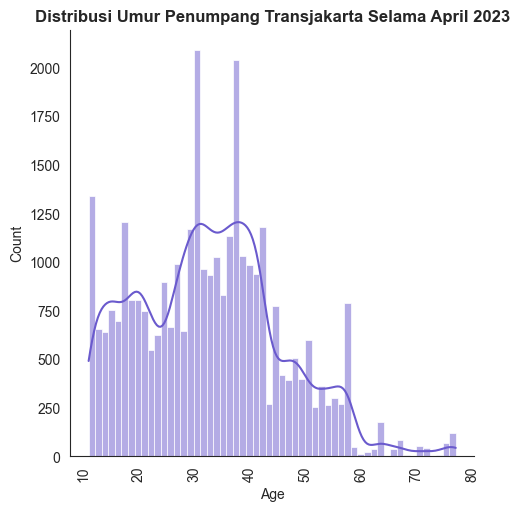

In [ ]:
plt.figure(figsize=(12,9))
sns.displot(df_trans['Age'],kde=True, color='slateblue')

plt.title('Distribusi Umur Penumpang Transjakarta Selama April 2023', fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

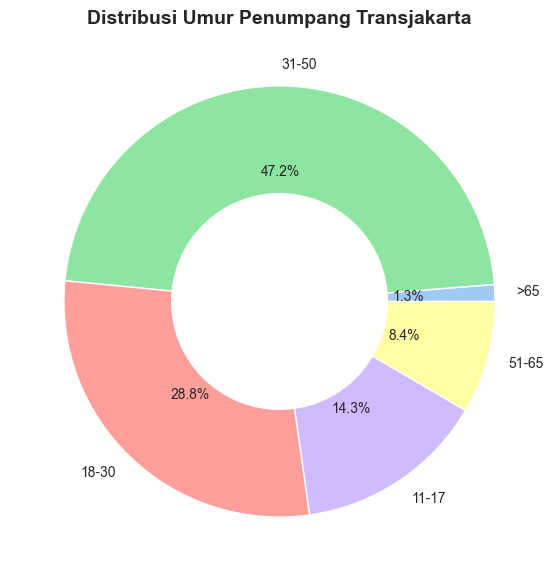

In [ ]:
Age_Segment = df_trans['Age_Segment'].value_counts()
colors = ['#8481DD','#A2D9D9','#EC7A08', '#519DE9', '#7CC674']
plt.figure(figsize=(8,7))
sns.set_style("white")
l, a = list(set(df_trans['Age_Segment'])), []
for j in range (len(Age_Segment)):
    a.append(df_trans['Age_Segment'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a, labels=l, colors=sns.color_palette('pastel6'), autopct='%1.1f%%')
plt.title('Distribusi Umur Penumpang Transjakarta', size=14, fontweight='bold')
hole = plt.Circle((0,0), 0.50, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

**Analisis Visualisasi Data** :

Distribusi jumlah umur penumpang dari semua golongan cenderung meningkat antara 11 sampai dengan sebelum umur 60, setelahnya jumlah penumpang dengan umur di atas 60 cenderung menurun sehingga menyebabkan Bagan Histogram menampilkan distribusi data terdistribusi tidak normal, dengan cenderung *right skewed*. Jumlah meningkatnya [usia produktif](https://www.bps.go.id/id/statistics-table/2/NzE1IzI=/jumlah-penduduk-usia-15-tahun-ke-atas-menurut-golongan-umur.html) (seperti usia antara 15-65) lebih tinggi dibanding usia lainnya dapat diasumsikan bahwa penumpang Transjakarta menggunakan layanan Transjakarta untuk kebutuhan transportasi menuju kantor untuk bekerja. Khususnya jika kita mengingat kembali bahwa koridor paling tinggi dengan transaksi per hari adalah Cibubur - Balai Kota, dimana penumpang di luar Jakarta menggunakan layanan Transjakarta untuk bekerja sampai dengan wilayah tengah kota Jakarta. Tentunya hal ini juga memperhitungkan asumsi penumpang yang transit selama perjalanan Cibubur - Balai Kota.

### 4.LineGraph Distribusi Umur Penumpang Jakarta

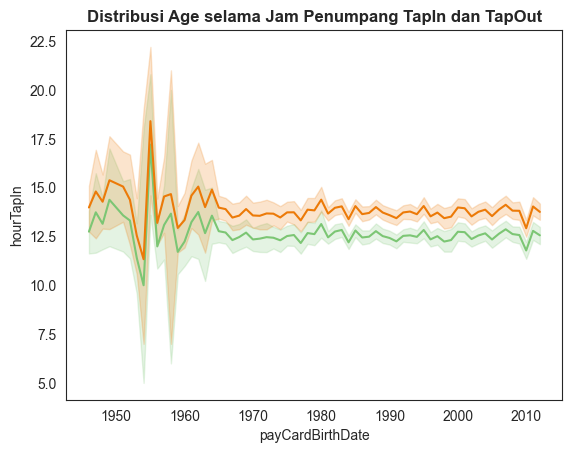

In [ ]:
sns.lineplot(data=df_trans, x='payCardBirthDate', y='hourTapIn', color='#7CC674')
sns.lineplot(data=df_trans, x='payCardBirthDate', y='hourTapOut', color='#EC7A08')
plt.title("Distribusi Age selama Jam Penumpang TapIn dan TapOut", fontweight='bold')
plt.show()

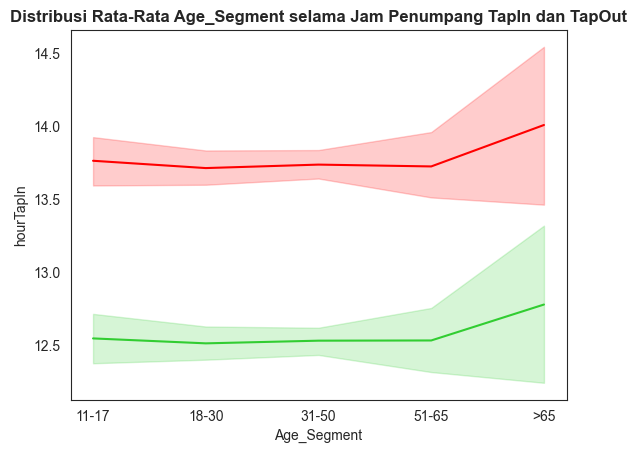

In [ ]:
sns.lineplot(data=df_trans, x='Age_Segment', y='hourTapIn', estimator=np.mean, color='limegreen')
sns.lineplot(data=df_trans, x='Age_Segment', y='hourTapOut',estimator=np.mean,  color='r')
plt.title("Distribusi Rata-Rata Age_Segment selama Jam Penumpang TapIn dan TapOut", fontweight='bold')
plt.show()


**Analisis Visualisasi Data** :

Distribusi rata-rata umur penumpang Transjakarta yang TapIn per hari muncul pada lebih jam 12.00 sampai dengan 12.30, sedangkan rata-rata umur penumpang Transjakarta yang TapOut muncul pada jam di atas 13.30 sampai dengan 14.00. Grafik linear naik di atas pukul 12.30 dan jumlah penumpang berumur lebih dari 51 semakin naik di jam berikutnya dibanding penumpang berumur 11 sampai dengan 50 yang cenderung stabil. Dalam hal ini, terdapat asumsi gambaran bahwa bagi penumpang yang berumur di atas 65 (yaitu usia non-produktif) memiliki ruang lebih untuk dapat menikmati fasilitas Transjakarta. Kita pahami bahwa Transjakarta menyediakan beberapa bagian dalam moda transportasi Kursi Duduk Prioritas (*priority seat*), salah satunya adalah untuk golongan umur di atas 65. Manfaat yang dapat diberikan jika kelompok penumpang berumur di atas 65 tidak bersinggungan dengan penumpang yang berusia produktif, akan memungkinkan untuk dapat memaksimalkan *priority seat*. Hal ini pun tidak memperhitungan suatu kondisi usia produktif yang memiliki disabilitas atau wanita yang sedang mengandung. Namun kedua kategori ini (kelompok disabilitas dan wanita mengandung) tidak tersedia dalam dataset Analisa Data ini, sehingga kita hanya dapat mengasumsikan keadaan pada kelompok prioritas penumpang berusia di atas 65 tahun.

Kondisi TapIn ini pun sama dengan kondisi TapOut dimana usia produktif cenderung stabil dan tidak bersinggungan dengan kelompok penumpang yang berumur di atas 65 tahun.

### 5.BarPlot Distribusi Jumlah Penumpang Transjakarta April 2023

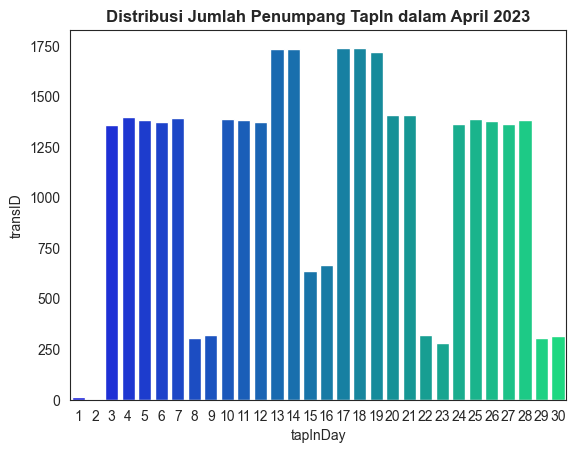

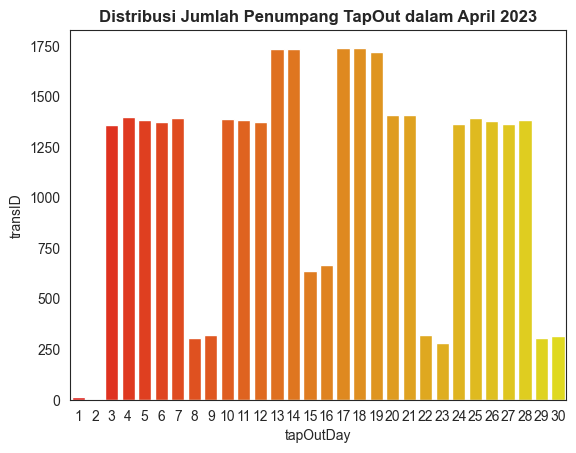

In [ ]:
pass_dayIn = df_trans[['transID', 'tapInDay']].groupby(['tapInDay']).count()
sns.set_style()
for i in pass_dayIn:
    sns.barplot(data=pass_dayIn, x='tapInDay', y='transID', palette="winter")
plt.title("Distribusi Jumlah Penumpang TapIn dalam April 2023", fontweight='bold')
plt.show()

pass_dayOut = df_trans[['transID', 'tapOutDay']].groupby(['tapOutDay']).count()
sns.set_style()
for i in pass_dayIn:
    sns.barplot(data=pass_dayOut, x='tapOutDay', y='transID', palette="autumn")
plt.title("Distribusi Jumlah Penumpang TapOut dalam April 2023", fontweight='bold')
plt.show()

**Analisis Visualisasi**

Distribusi Jumlah Penumpang TapOut dan TapIn Transjakarta selama bulan April 2023 cenderung dalam porsi yang sama. Jumlah penumpang ini terlihat dari banyaknya transaksi per hari dari setiap TapIn dan TapOut. Jika kita melihat seksama, bagan Batang cenderung naik di awal pekan dengan jumlah transaksi lebih dari 1250 dan paling besar di 1700. Sedangkan jumlah penumpang yang turun drastis tidak lebih dari 700 dan lainnya stabil di sekitar angka 250 pada akhir pekan.

Mengingat kembali kepadatan koridor Transjakarta pada bagan ScatterPlot di atas, LineGraph ini mendukung asumsi bahwa banyak penumpang Transjakarta yang menggunakan moda transportasi untuk kebutuhan komut bekerja dan didominasi oleh penumpang yang berusia produktif.

In [ ]:
#rata rata transaksi sehari
TapIn_mean = pass_dayIn.mean()
TapOut_mean = pass_dayOut.mean()
trax_mean = (TapIn_mean + TapOut_mean) / 2
print(f"Jumlah rata-rata transaksi sehari adalah sejumlah {trax_mean}")

Jumlah rata-rata transaksi sehari adalah sejumlah transID    1086.5
dtype: float64


##**B. Hypothesis Testing**

###*Distribusi Transaksi Transjakarta*


Dengan mempertimbangkan Targeted Variables bersifat kontinyu dan dalam sample yang besar, maka dalam Analisa Data ini kita akan menggunakan test statistik *normaltest* untuk melakukan pengecekan apakah distribusi jumlah transaksi TapIn maupun TapOut normal. Lebih lanjut, sesuai visualisasi di atas bahwa distribusi jumlah transaksi TapIn dan TapOut cenderung sama, maka kita akan memperlakukan data TapIn dengan TapOut sama.

In [ ]:

import scipy.stats as stats
from scipy.stats import normaltest
stats, pval=normaltest(pass_dayIn)
if pval<=0.05:
    print('Distribusi Transaksi Transjakarta selama bulan April 2023 tidak normal') #Ha
else:
    print('Distribusi Transaksi Transjakarta selama bulan April 2023 normal') #Ho


Distribusi Transaksi Transjakarta selama bulan April 2023 tidak normal


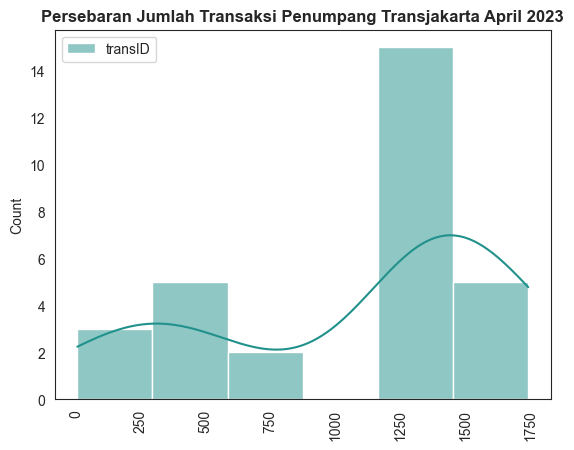

In [ ]:

sns.histplot(pass_dayIn,kde=True, palette='viridis')
plt.xticks(rotation = 90)
plt.title('Persebaran Jumlah Transaksi Penumpang Transjakarta April 2023', fontweight='bold')
plt.show()

Distribusi jumlah penumpang Transjakarta tidak normal hal ini mungkin dapat terpengaruh dari aktivitas golongan usia produktif yang cenderung lebih banyak menggunakan moda transportasi Transjakarta untuk pulang pergi bekerja dibanding golongan umur lainnya  di bawah 18 dan di atas 65 tahun. Namun, mengingat bahwa jumlah pembayaran yang bernilai Rp0 hampir 50% dari seluruh transaksi dalam sebulan, ada kemungkinan bahwa terdapat pembayaran dari penumpang usia produktif tidak dikenakan biaya dalam penggunaan moda transportasi Jakarta.

Sehingga menjawab pertanyaan permasalah rute yang paling tertinggi adalah **Cibubur - Balai Kota dengan banyaknya faktor yang berkontribusi terhadap kepadatan jalur moda transportasi Jakarta dalam koridor tersebut**.  

#**IV. Kesimpulan dan Rekomendasi**

##**A. Kesimpulan**

Kesimpulan yang dapat diambil dari Analisis Data ini adalah:

1. Terdapat sekitar 84% jumlah penumpang Transjakarta merupakan usia produktif (antara usia 18 - 65 tahun)
2. Koridor Transjakarta dengan jumlah transaksi paling tinggi dalam sebulan paling banyak dari Koridor Cibubur - Balai Kota
3.  Terdapat probabilitas bahwa dengan penumpang usia produktif dan jumlah TapIn berasal dari Koridor Cibubur dimana terletak di wilayah Jakarta, moda transportasi Transjakarta digunakan oleh banyak orang yang berdomisili di luar Jakarta untuk pergi dan pulang bekerja
4.  Data mendukung bahwa penggunaan moda transportasi Transjakarta padat selama awal pekan atau hari kerja
5.  Sekalipun tingkat transaksi tinggi namun masih terdapat 43.8% penumpang menikmati fasilitas layanan Transjakarta tanpa terbeban biaya



##**B. Rekomendasi**

1.  Peningkatan pengelolaan dan pemeliharaan mesin TapOut oleh Transjakarta guna menerima dan mencatat pembayaran penumpang.
2.  Melakukan pemeliharan seluruh mesin yang menjadi sarana operasi Transjakarta secara berkala.


##**C. Highlight**

Transjakarta memiliki banyak potensi dalam meningkatkan pendapatan karena biaya transportasi yang cenderung rendah sehingga terjangkau oleh semua golongan penumpang, khususnya dari sisi usia dan ekonomi. Kebutuhan penumpang sehari-hari merupakan salah satu faktor pendorong kepadatan penumpang Transjakarta yang dapat berkontribusi terhadap penghasilan Transjakarta. Diharapkan dengan rekomendasi di atas, pendapatan Transjakarta dapat meningkat.

#*Miscellaneous*

Ekspor Data Menjadi exl. format

In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32595 entries, 0 to 37899
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           32595 non-null  object        
 1   payCardID         32595 non-null  int64         
 2   payCardBank       32595 non-null  object        
 3   payCardName       32595 non-null  object        
 4   payCardSex        32595 non-null  object        
 5   payCardBirthDate  32595 non-null  int64         
 6   corridorID        32595 non-null  object        
 7   corridorName      32595 non-null  object        
 8   direction         32595 non-null  float64       
 9   tapInStops        32595 non-null  object        
 10  tapInStopsName    32595 non-null  object        
 11  tapInStopsLat     32595 non-null  float64       
 12  tapInStopsLon     32595 non-null  float64       
 13  stopStartSeq      32595 non-null  int64         
 14  tapInTime         32595 non

In [ ]:
df_trans.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,hourTapIn,tapInDay,tapInMonth,tapInYear,hourTapOut,tapOutDay,tapOutMonth,tapOutYear,Age
count,3.259500e+04,32595.000000,32595.000000,32595.000000,32595.000000,32595.000000,32595,32595.000000,32595.000000,32595.000000,32595,32595.000000,32595.000000,32595.000000,32595.0,32595.0,32595.000000,32595.000000,32595.0,32595.0,32595.000000
mean,4.279358e+17,1990.164811,0.500568,-6.214838,106.841508,13.522595,2023-04-16 08:01:07.714526720,-6.214726,106.841283,21.169351,2023-04-16 09:13:21.510752768,1895.766222,12.531493,15.791134,4.0,2023.0,13.735573,15.791164,4.0,2023.0,32.835189
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000,5.000000,1.000000,4.0,2023.0,0.000000,1.000000,4.0,2023.0,11.000000
25%,1.800407e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,2023-04-10 09:08:43,-6.247225,106.801750,11.000000,2023-04-10 10:21:58,0.000000,7.000000,10.000000,4.0,2023.0,8.000000,10.000000,4.0,2023.0,22.000000
50%,3.507251e+15,1990.000000,1.000000,-6.214587,106.834670,10.000000,2023-04-16 17:50:51,-6.214787,106.834810,18.000000,2023-04-16 19:14:17,3500.000000,13.000000,16.000000,4.0,2023.0,15.000000,16.000000,4.0,2023.0,33.000000
75%,4.704902e+15,2001.000000,1.000000,-6.175579,106.882270,19.000000,2023-04-21 21:27:09,-6.174933,106.883410,29.000000,2023-04-21 22:52:51.500000,3500.000000,17.000000,21.000000,4.0,2023.0,19.000000,21.000000,4.0,2023.0,41.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:51:08,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,3500.000000,21.000000,30.000000,4.0,2023.0,23.000000,30.000000,4.0,2023.0,77.000000
std,1.325782e+18,13.020913,0.500007,0.057875,0.060397,12.166355,NaN,0.059042,0.061106,13.773718,NaN,1703.010842,5.715189,7.712453,0.0,0.0,5.947655,7.712488,0.0,0.0,13.020913


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
transID,37900,37900,EIIW227B8L34VB,1
payCardBank,37900,6,dki,18743
payCardName,37900,1993,Fathonah Saefullah,80
payCardSex,37900,2,F,20157
corridorID,36643,221,1T,400
corridorName,35970,216,Cibubur - Balai Kota,391
tapInStops,36687,2570,P00170,236
tapInStopsName,37900,2602,Penjaringan,243
tapInTime,37900,37079,2023-04-25 06:23:00,3
tapOutStops,35611,2230,P00016,306


In [ ]:
df_trans.shape

(32595, 36)

In [ ]:
df_trans.to_excel('/Users/katedethan/Documents/Data Science & Machine Learning Class/Exam Module 2/PCM2 JCDSOL016 - Katherine Dethan.xlsx',index=False)